In [1]:
from sklearn import datasets

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from matplotlib import pyplot as plt
import matplotlib
from matplotlib.colors import ListedColormap
%matplotlib inline

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [35]:
sample_ds = datasets.make_classification(n_samples=1500,
                                         n_features=2,
                                         n_informative=2,
                                         n_classes=4,
                                         n_redundant=0,
                                         n_clusters_per_class=1,
                                         random_state=6)

In [36]:
sample_ds[0].shape

(1500, 2)

In [37]:
def plot_2d(data, colors, l):
    plt.figure(figsize(9, 9))
    plt.scatter(map(lambda x: x[0], data[0]), map(lambda x: x[1], data[0]), c=data[1], cmap=colors)
    plt.legend([l])

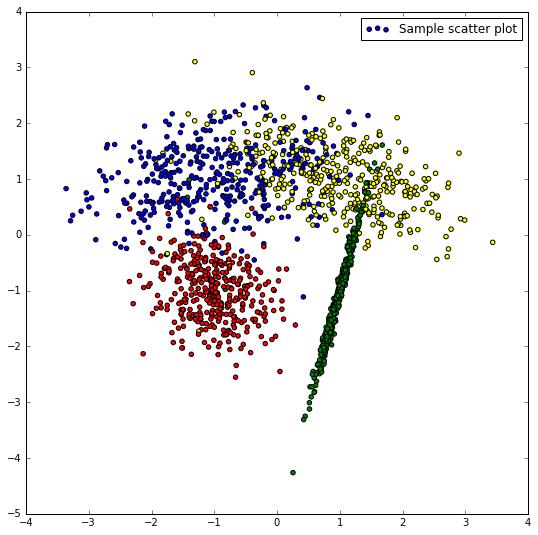

In [38]:
colors = ListedColormap(['red', 'blue', 'green', 'yellow'])
plot_2d(sample_ds, colors, 'Sample scatter plot')

In [39]:
X = sample_ds[0]
y = sample_ds[1]

knn_clr = KNeighborsClassifier(n_neighbors=3)
knn_clr.fit(X, y) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

(-5.2627802423616128, 4.0972197576381877)

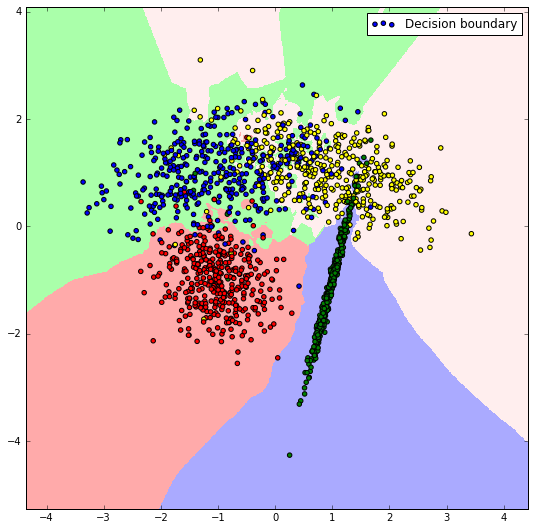

In [40]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFEEEE'])
cmap_bold = colors

h = .01  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn_clr.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

#plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
data = sample_ds
plt.scatter(map(lambda x: x[0], data[0]), map(lambda x: x[1], data[0]), c=data[1], cmap=colors)
plt.legend(['Decision boundary'])
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

In [41]:
n_folds = 5
kf = KFold(n_splits=n_folds)
kf.get_n_splits(X)
print(kf)

KFold(n_splits=5, random_state=None, shuffle=False)


In [42]:
clrs = []
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clr = KNeighborsClassifier(n_neighbors=3)
    clr.fit(X_train, y_train) 

In [57]:
ks = np.arange(1, 50)
scores = []
scores_std= []

for k in ks:
    clr = KNeighborsClassifier(n_neighbors=k)
    this_scores = cross_val_score(clr, X, y, cv=n_folds, n_jobs=1, scoring='accuracy')
    scores.append(np.mean(this_scores))

In [58]:
print(''.join(["The best score is: ", str(scores[np.argmax(scores)]), " with k=", str(ks[np.argmax(scores)])]))

The best score is: 0.873980612343 with k=20


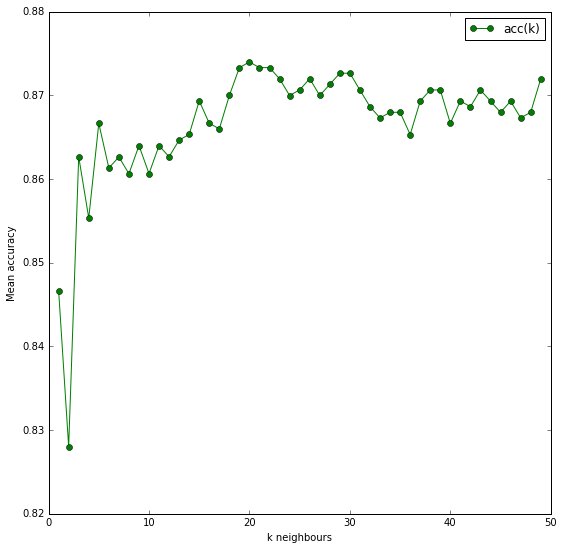

In [80]:
plt.plot(ks, scores, color='green', marker='o')
plt.ylabel('Mean accuracy')
plt.xlabel('k neighbours')
plt.legend(['acc(k)'])